# Worksheet 06

Name:  SHOWNDARYA MADHAVAN
UID:

### Topics

- Density-Based Clustering

### Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

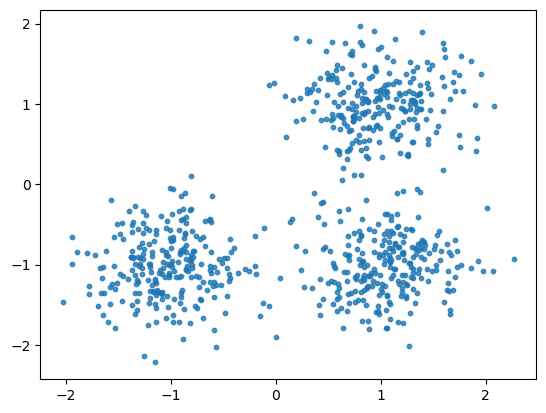

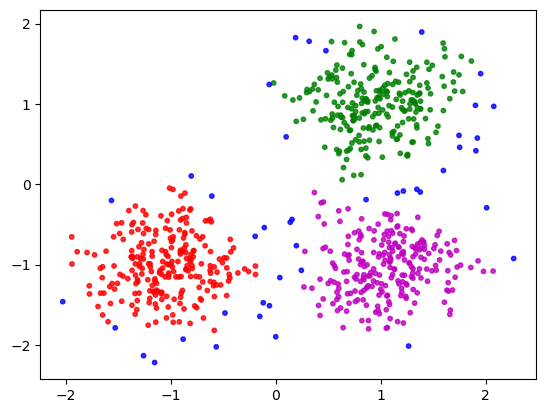

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon
        self.assignments = [0 for _ in range(len(self.dataset))]
        
    def is_core(self, i):
        neighbors=[]
        for j in range(len(self.dataset)):
            if i != j and np.linalg.norm(self.dataset[i] - self.dataset[j]) <= self.epsilon:
                neighbors.append(j)
        return len(neighbors) >= self.min_pts
    
    def get_unlabeled_neighborhood(self, i):
        neighbors=[]
        for j in range(len(self.dataset)):
            if i != j and self.assignments[j] == 0 and np.linalg.norm(self.dataset[i] - self.dataset[j]) <= self.epsilon:
                neighbors.append(j)
        return neighbors
    
    def dfs_assignment(self, i, cluster_number):
        self.assignments[i] = cluster_number
        neighbors = self.get_unlabeled_neighborhood(i)
        while neighbors:
            next_neighbor = neighbors.pop()
            if self.assignments[next_neighbor] != 0:
                #print(next_neighbor)
                continue
            self.assignments[next_neighbor] = cluster_number
            if self.is_core(next_neighbor):
                neighbors += self.get_unlabeled_neighborhood(next_neighbor)
        

    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        # init assignments with all dataset points to 0 i.e unlabeled
        cluster_number = 1
        for i in range(len(self.dataset)):
            if self.is_core(i) and self.assignments[i] == 0:
                self.dfs_assignment(i, cluster_number)
            cluster_number +=1    
        return self.assignments

clustering = DBC(X, 3, .2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 30)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()